# Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Para mostrar todas las columnas.
pd.pandas.set_option('display.max_columns',None)

## Carga del dataset

In [3]:
# Cargar dataset
data = pd.read_csv("../../datasets/houseprices.csv")

print(data.shape)

data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Missing Values

In [6]:
# Listado de variables con algún missing value
vars_with_na = [var for var in data.columns if data[var].isnull().sum() >= 1]

for var in vars_with_na:
    percentage = np.round(data[var].isnull().mean(),3) * 100
    print(var, percentage, "% missing values")


LotFrontage 17.7 % missing values
Alley 93.8 % missing values
MasVnrType 0.5 % missing values
MasVnrArea 0.5 % missing values
BsmtQual 2.5 % missing values
BsmtCond 2.5 % missing values
BsmtExposure 2.6 % missing values
BsmtFinType1 2.5 % missing values
BsmtFinType2 2.6 % missing values
Electrical 0.1 % missing values
FireplaceQu 47.3 % missing values
GarageType 5.5 % missing values
GarageYrBlt 5.5 % missing values
GarageFinish 5.5 % missing values
GarageQual 5.5 % missing values
GarageCond 5.5 % missing values
PoolQC 99.5 % missing values
Fence 80.80000000000001 % missing values
MiscFeature 96.3 % missing values


In [7]:
## Relación entre variables con missing values y Valor de Venta

In [19]:
def analyze_na_value(df, var):
    # "missing" carga 1 si la variable está missing en esa observación y 0 si no.
    missing = np.where(df[var].isnull(), 1, 0)
    dg = pd.DataFrame({"missing": missing, "SalePrice": df.SalePrice})
    # Agrupamos por perdido o no perdido, agregando con la mediana.
    dg.groupby("missing")["SalePrice"].median().plot.bar()
    plt.title("Missing " + str(var))
    plt.show()
    

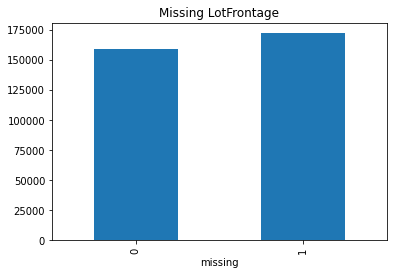

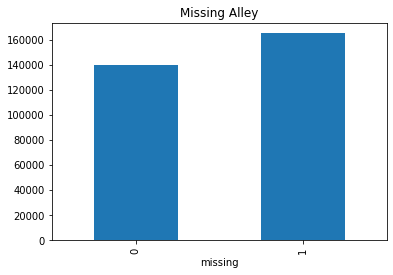

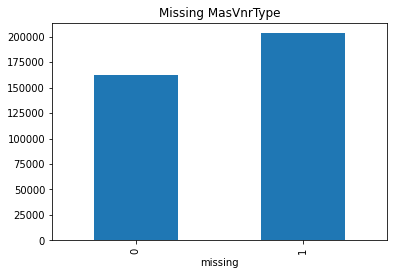

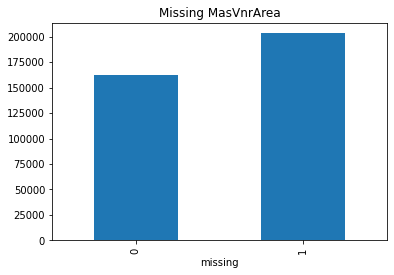

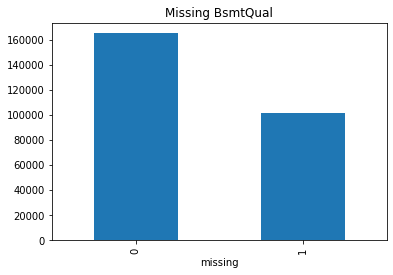

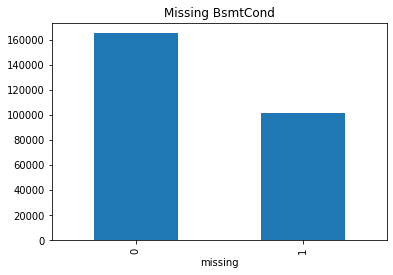

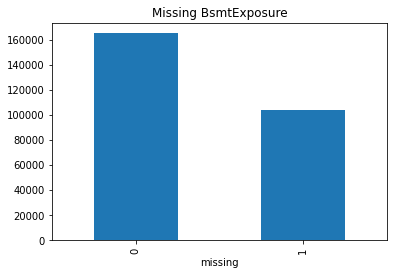

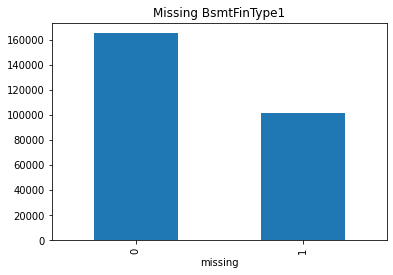

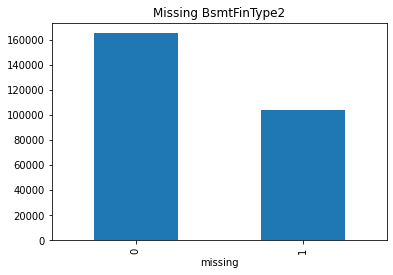

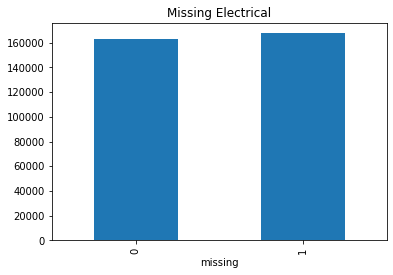

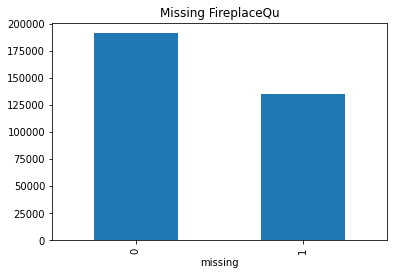

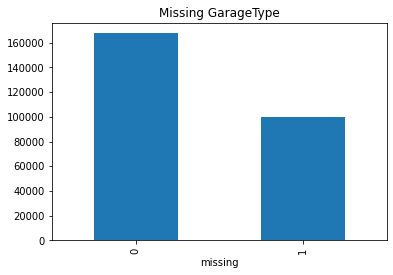

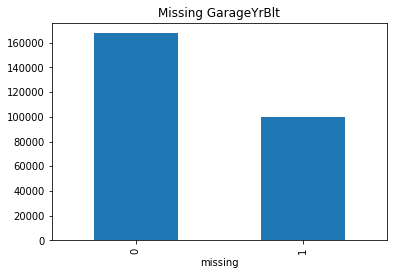

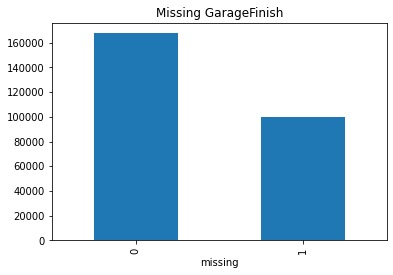

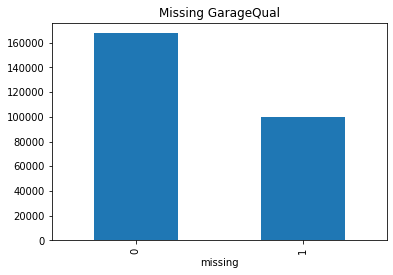

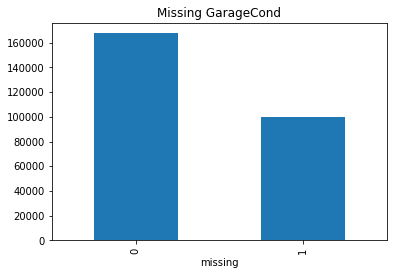

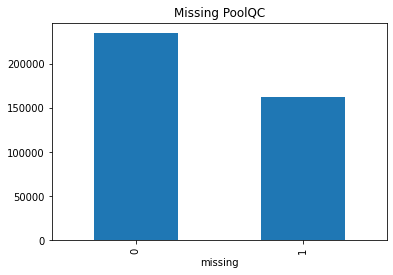

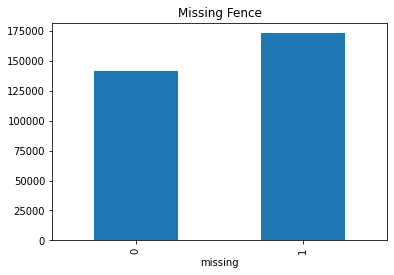

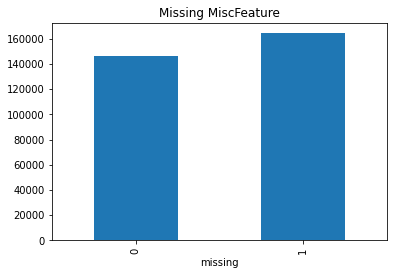

In [20]:
for var in vars_with_na:
    analyze_na_value(data, var)

## Variables numéricas

In [22]:
# Obtener las variables que no son object
num_vars = [var for var in data.columns if data[var].dtypes != 'O']
print("# de variables numéricas", len(num_vars))
data[num_vars].head()

# de variables numéricas 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [23]:
# Analizando el Id, hay uno para cada fila, se debería descartar.
print("Cantidad de registros", len(data))
print("Cantidad de IDs distintos", len(data.Id.unique()))

Cantidad de registros 1460
Cantidad de IDs distintos 1460


## Variables temporales (fechas)

In [25]:
year_vars = [var for var in num_vars if "Yr" in var or "Year" in var]
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [26]:
# Posibles valores de esas variables
for var in year_vars:
    print(var, data[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

Text(0.5, 1.0, 'Evolución del precio de la casa según los años')

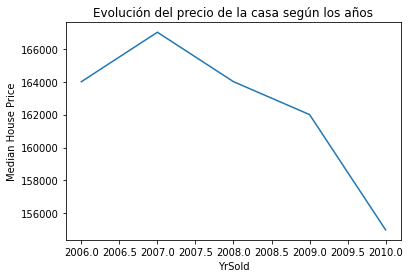

In [27]:
# Ploteo de median houseprice a través de los años.
data.groupby('YrSold')["SalePrice"].median().plot()
plt.ylabel("Median House Price")
plt.title("Evolución del precio de la casa según los años")

In [28]:
# Examinar la relación entre las variables anuales  y el precio de la casa.
def analyze_year_var(df, var):
    # Diferencia entre el año de venta y la variable de año en cuestión
    diff = df["YrSold"] - df[var]
    
    plt.scatter(diff, df["SalePrice"])
    plt.ylabel("SalePrice")
    plt.xlabel("Diferencia entre YrSold y " + str(var))
    plt.show()
    

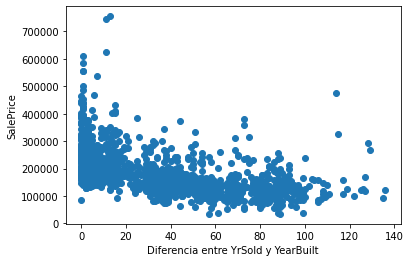

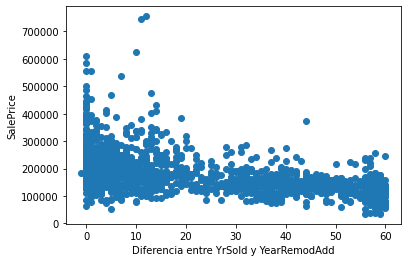

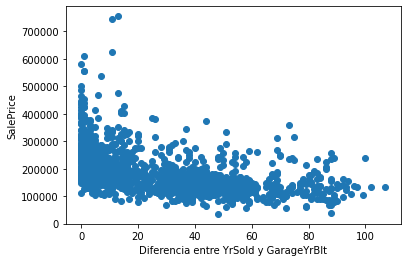

In [29]:
for var in year_vars:
    if var != "YrSold":
        analyze_year_var(data, var)

## Variables Discretas

In [32]:
# Se las considera variables no anuales ni Id que tengan menos de 20 valores distintos
discrete_vars = [var for var in num_vars if len(data[var].unique()) < 20 and var not in year_vars + ["Id"]]

print("# Variables discretas", len(discrete_vars))

data[discrete_vars].head()

# Variables discretas 14


,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,60,7,5,1,0,2,1,3,1,8,0,2,0,2
1,20,6,8,0,1,2,0,3,1,6,1,2,0,5
2,60,7,5,1,0,2,1,3,1,6,1,2,0,9
3,70,7,5,1,0,1,0,3,1,7,1,3,0,2
4,60,8,5,1,0,2,1,4,1,9,1,3,0,12


In [33]:
def analyze_discrete(df, var):
    df.groupby(var)["SalePrice"].median().plot.bar()
    plt.title(var)
    plt.ylabel("Median Sale Price")
    plt.show()


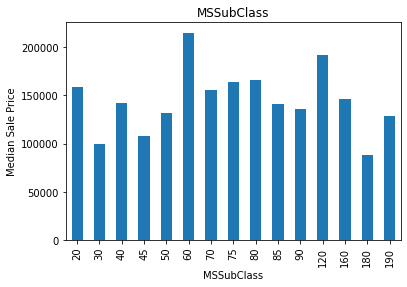

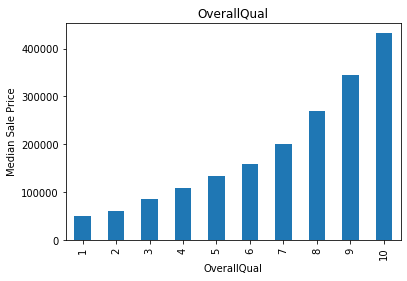

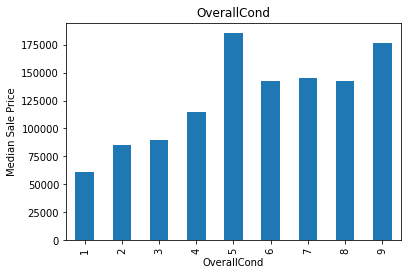

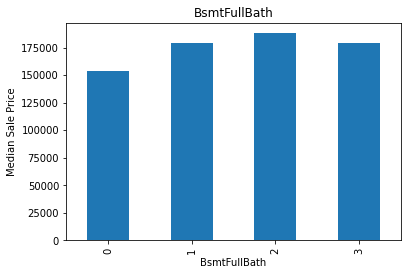

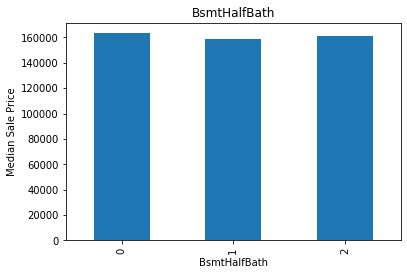

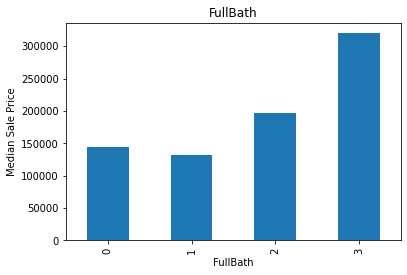

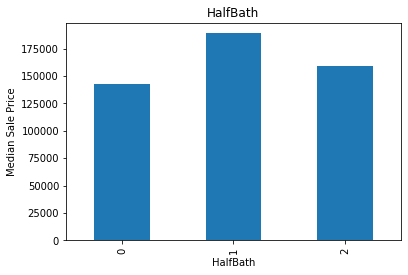

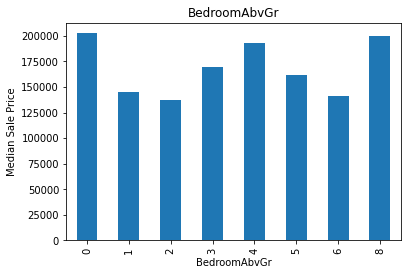

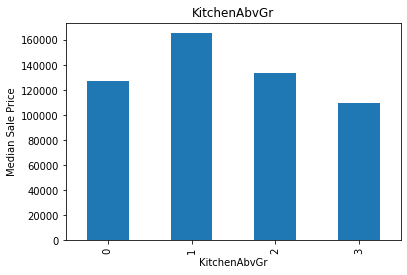

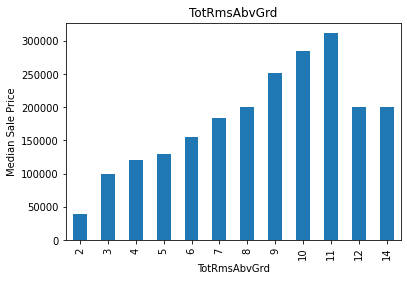

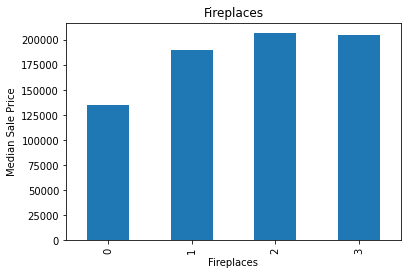

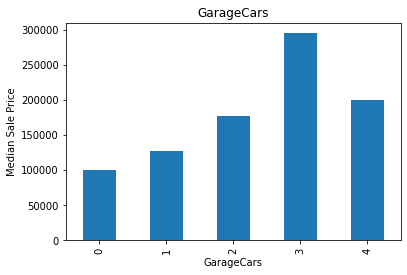

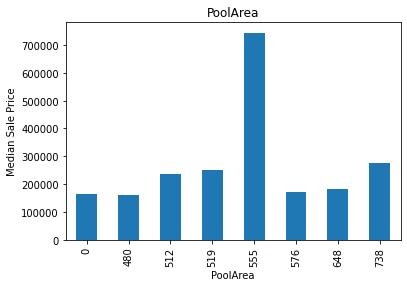

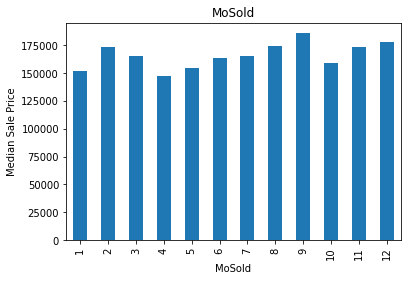

In [34]:
for var in discrete_vars:
    analyze_discrete(data, var)

## Variables continuas 

In [36]:
cont_vars = [var for var in num_vars if var not in discrete_vars + year_vars + ["Id"]]

print("# Continuous variables", len(cont_vars))

data[cont_vars].head()

# Continuous variables 19


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,250000


In [37]:
def analyze_continuous(df, var):
    df[var].hist(bins=20)
    plt.ylabel("Number of houses")
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    

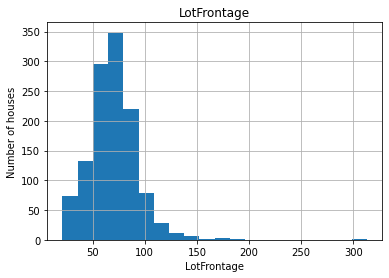

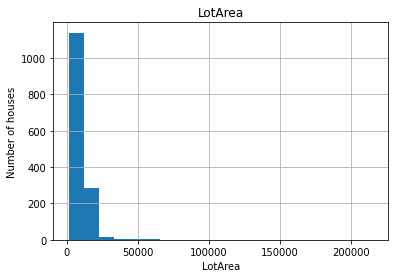

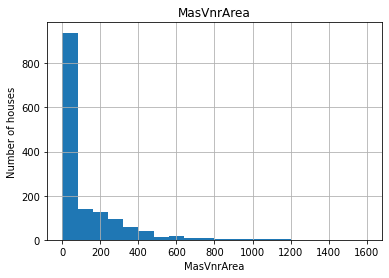

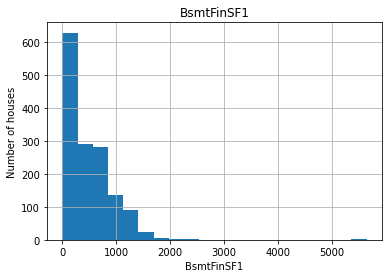

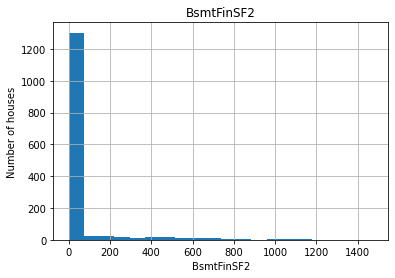

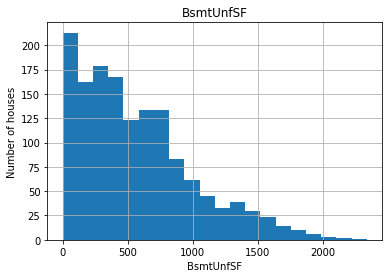

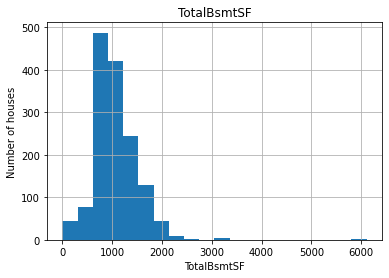

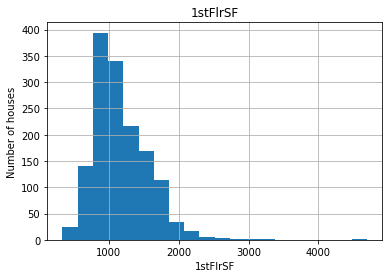

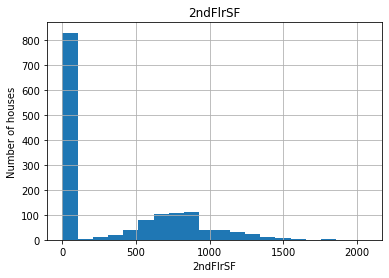

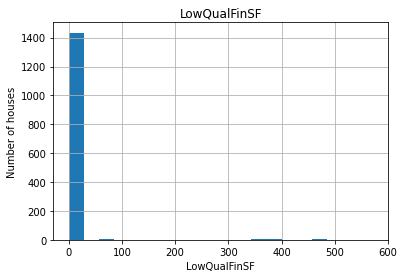

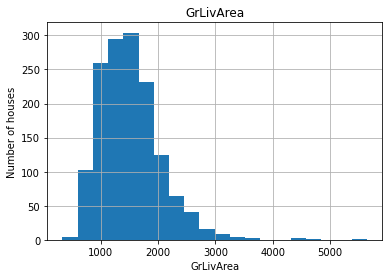

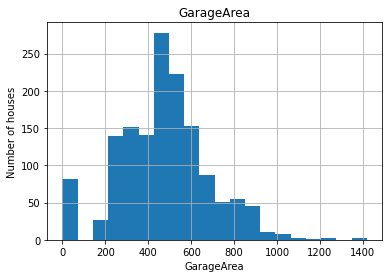

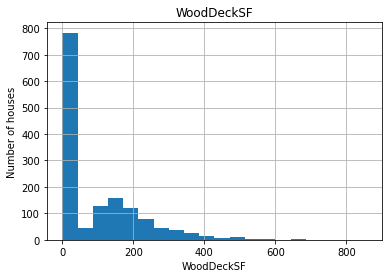

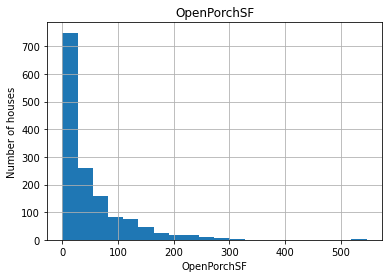

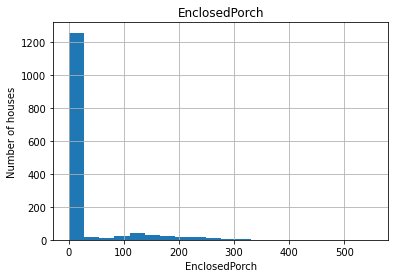

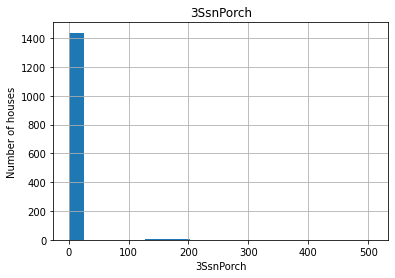

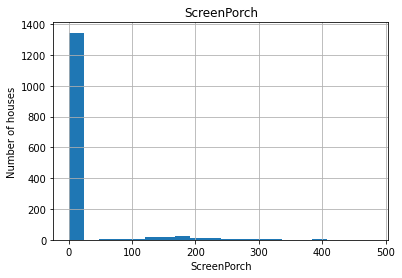

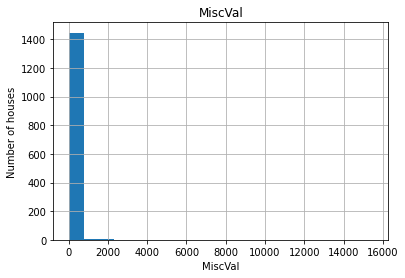

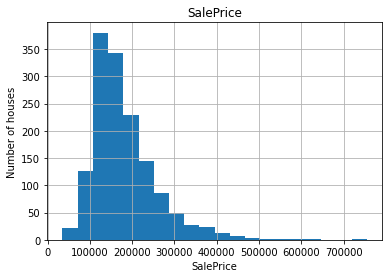

In [38]:
for var in cont_vars:
    analyze_continuous(data, var)

In [39]:
# Aplicación de logaritmno sobre aquellas en donde sea posible, a fin de ver si mejora
# la normalidad.
def analyze_transformed_continuous(df, var):
    if 0 in data[var].unique():
        return
    log_var = np.log(df[var])
    plt.hist(log_var,bins=20)
    plt.ylabel("Number of houses")
    plt.xlabel("Log of " + str(var))
    plt.title(var)
    plt.show()

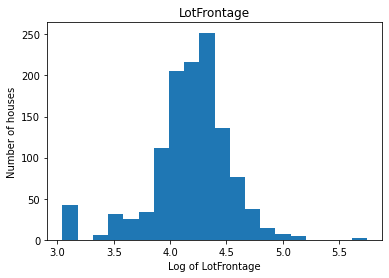

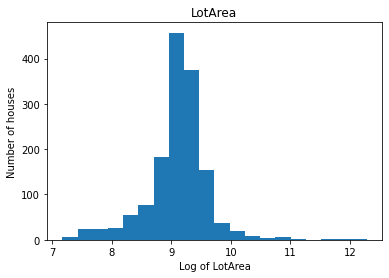

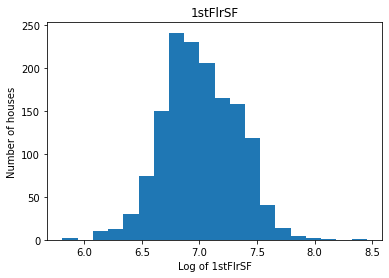

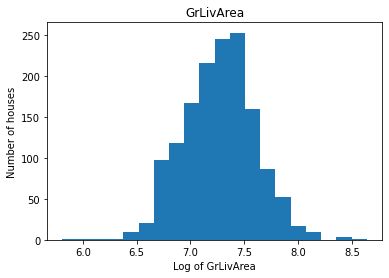

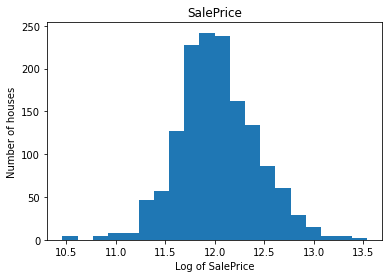

In [40]:
for var in cont_vars:
    analyze_transformed_continuous(data, var)

In [43]:
# Scatter plot a los logs de las variables
def analyze_transformed_continuous_scatter(df, var):
    if 0 in data[var].unique():
        return
    log_var = np.log(df[var])
    plt.scatter(log_var, df["SalePrice"])
    plt.ylabel("Sale Price")
    plt.xlabel("Log of " + str(var))
    plt.title(var)
    plt.show()

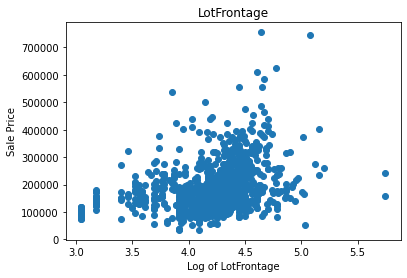

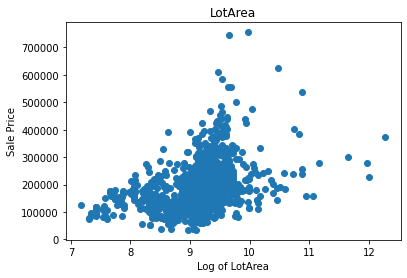

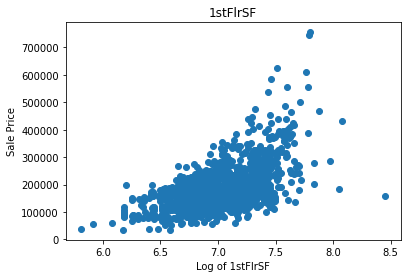

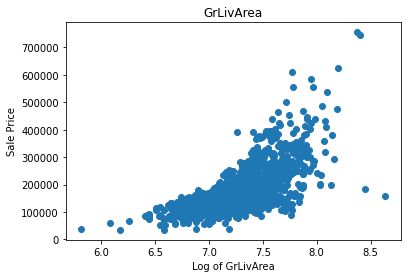

In [44]:
for var in cont_vars:
    if var != "SalePrice":
        analyze_transformed_continuous_scatter(data, var)

## Outliers



In [45]:
def find_outlier(df, var):
    df.boxplot(column=var)
    plt.title(var)
    plt.ylabel(var)
    plt.show()
    
    if 0 in data[var].unique():
        return
    log_var = np.log(df[var])
    new_name = "log_" + str(var)
    dg = pd.DataFrame({new_name : log_var})
    dg.boxplot(column=new_name)
    plt.title(new_name)
    plt.ylabel(new_name)
    plt.show()

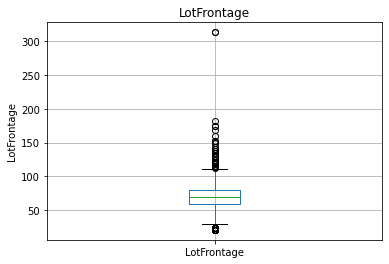

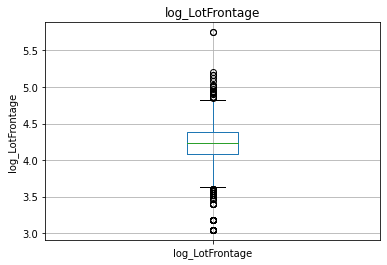

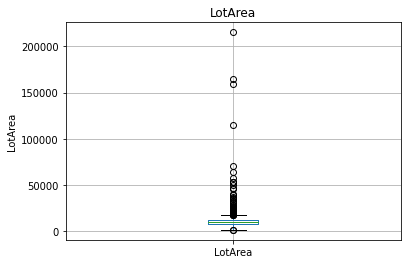

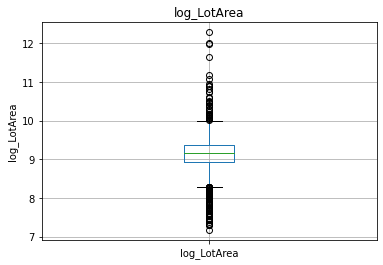

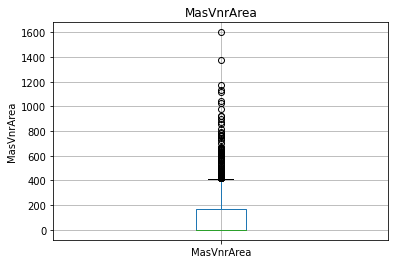

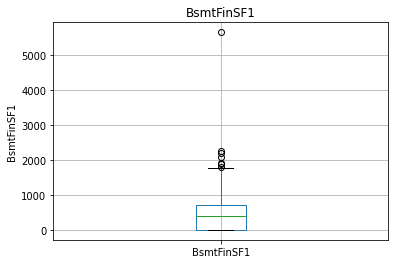

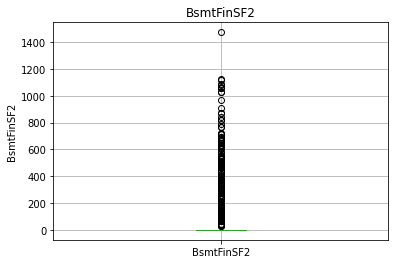

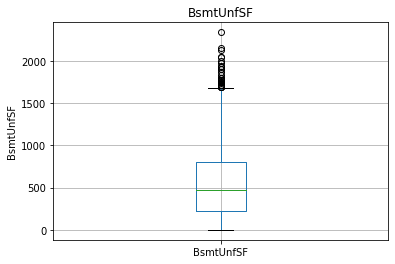

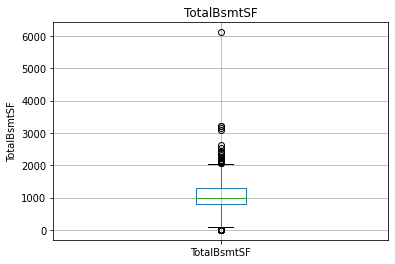

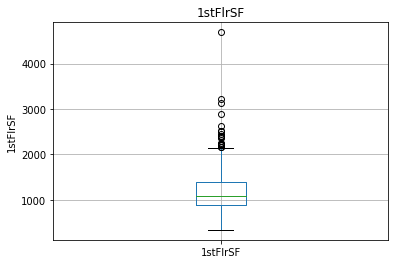

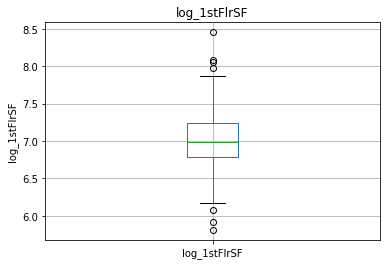

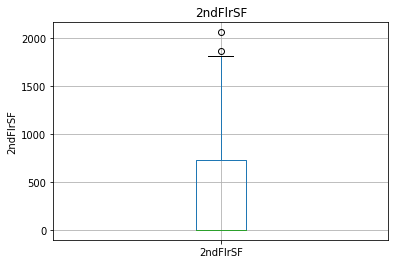

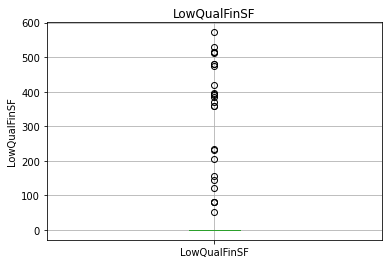

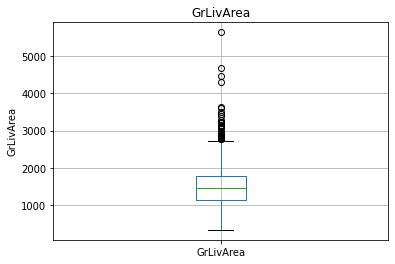

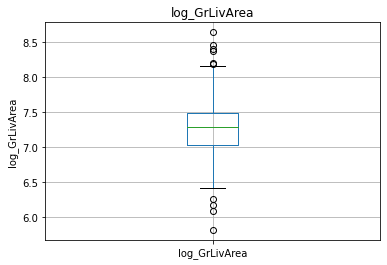

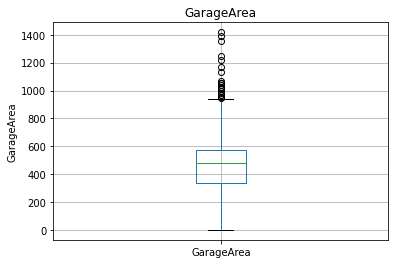

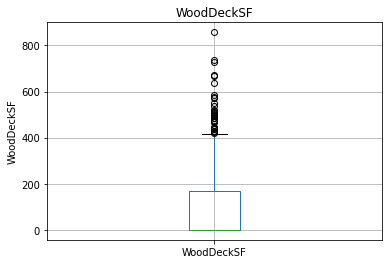

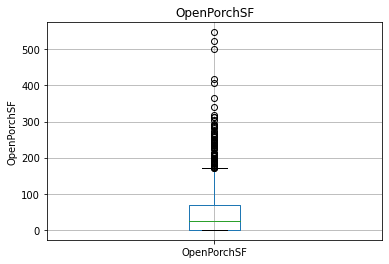

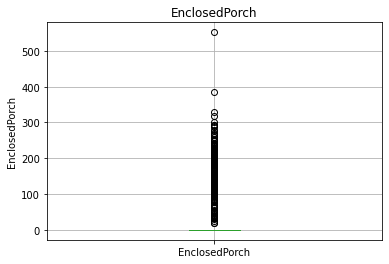

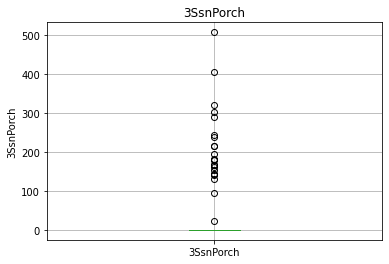

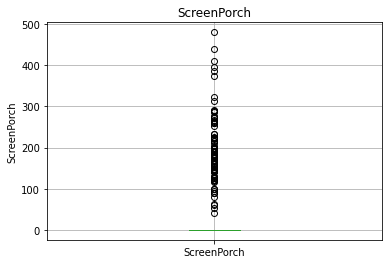

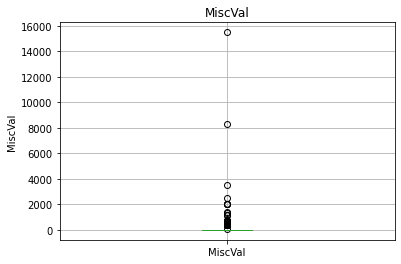

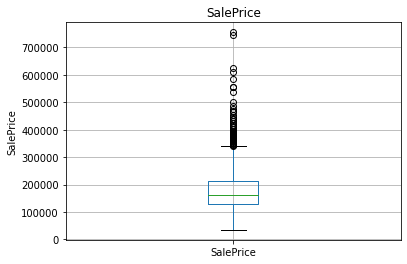

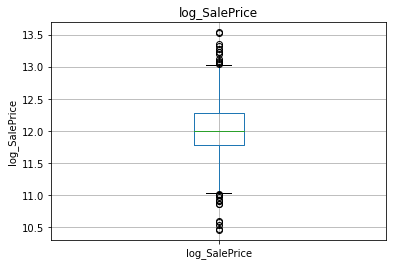

In [46]:
for var in cont_vars:
    find_outlier(data, var)

## Variables categóricas

In [48]:
cat_vars = [var for var in data.columns if data[var].dtypes == "O"]

print("# of Categorical Variables: ", len(cat_vars))

data[cat_vars].head()

# of Categorical Variables:  43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [49]:
# Cantidad de categorías por variable.
for var in cat_vars:
    print(var, len(data[var].unique()), " categories")

MSZoning 5  categories
Street 2  categories
Alley 3  categories
LotShape 4  categories
LandContour 4  categories
Utilities 2  categories
LotConfig 5  categories
LandSlope 3  categories
Neighborhood 25  categories
Condition1 9  categories
Condition2 8  categories
BldgType 5  categories
HouseStyle 8  categories
RoofStyle 6  categories
RoofMatl 8  categories
Exterior1st 15  categories
Exterior2nd 16  categories
MasVnrType 5  categories
ExterQual 4  categories
ExterCond 5  categories
Foundation 6  categories
BsmtQual 5  categories
BsmtCond 5  categories
BsmtExposure 5  categories
BsmtFinType1 7  categories
BsmtFinType2 7  categories
Heating 6  categories
HeatingQC 5  categories
CentralAir 2  categories
Electrical 6  categories
KitchenQual 4  categories
Functional 7  categories
FireplaceQu 6  categories
GarageType 7  categories
GarageFinish 4  categories
GarageQual 6  categories
GarageCond 6  categories
PavedDrive 3  categories
PoolQC 4  categories
Fence 5  categories
MiscFeature 5  categor

In [50]:
## Rare Labels.
def analyze_rare_labels(df, var, rare_perc):
    tmp = df.groupby(var)["SalePrice"].count() / len(df)
    return tmp[tmp < rare_perc]

In [52]:
for var in cat_vars:
    print(analyze_rare_labels(data, var, 0.01))
    print()

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

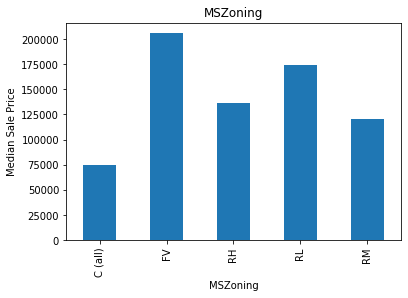

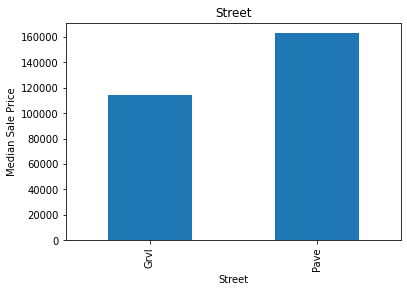

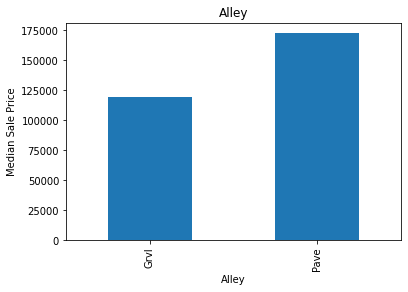

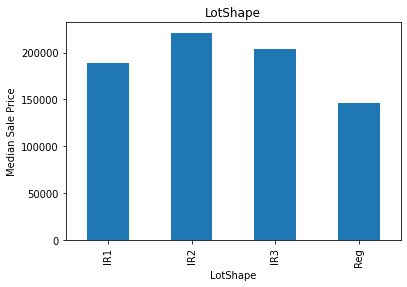

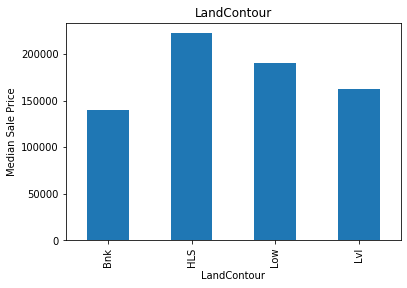

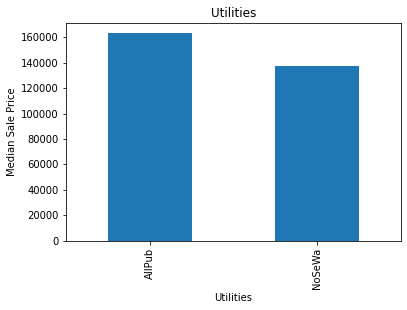

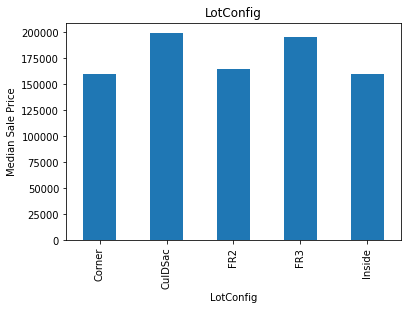

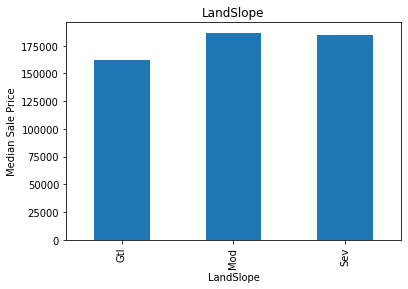

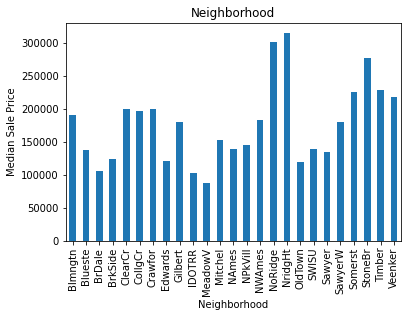

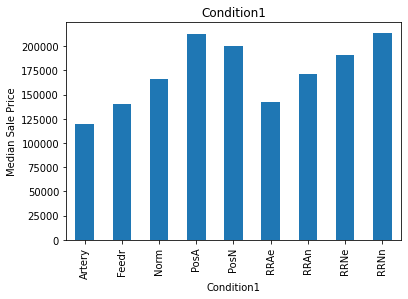

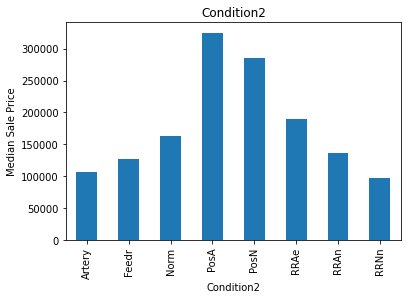

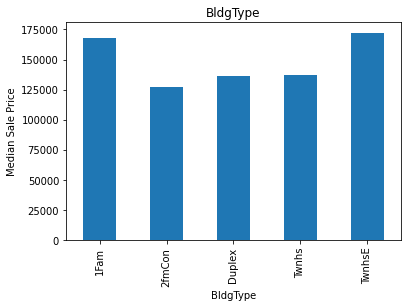

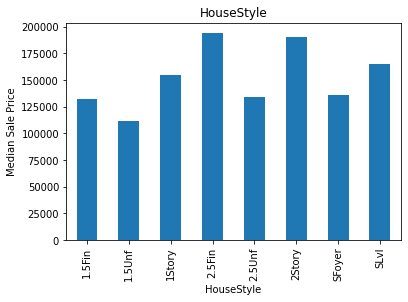

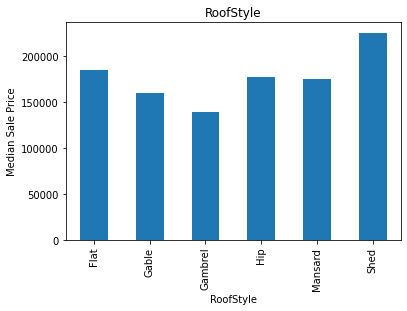

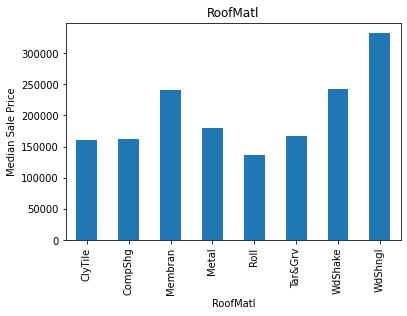

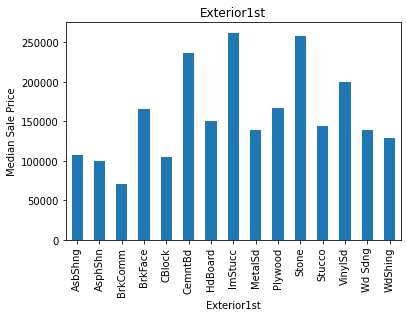

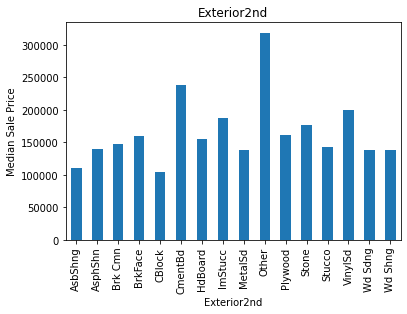

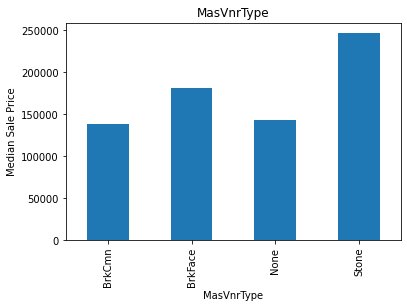

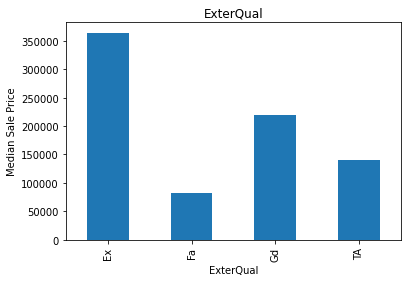

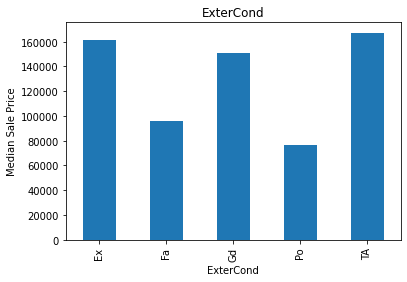

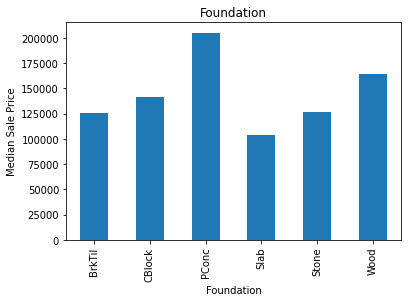

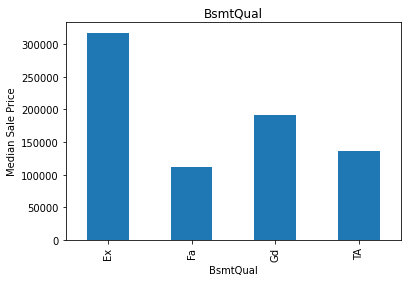

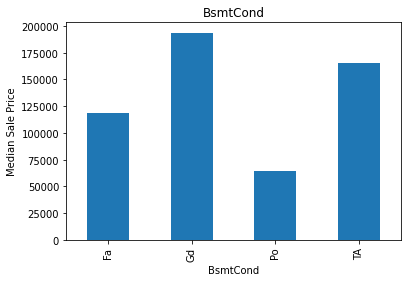

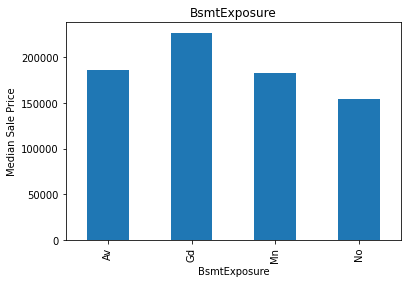

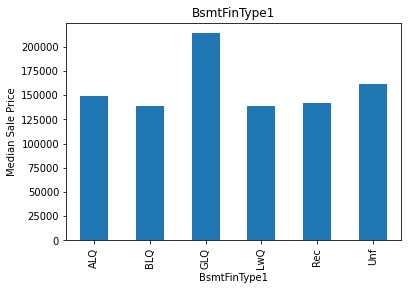

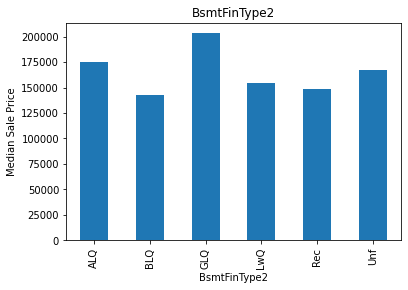

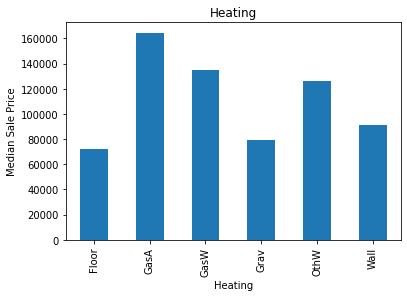

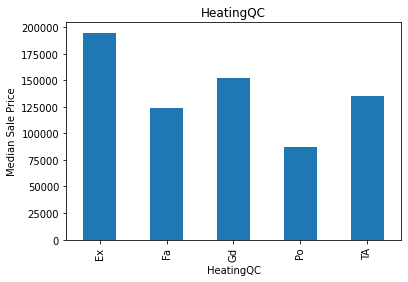

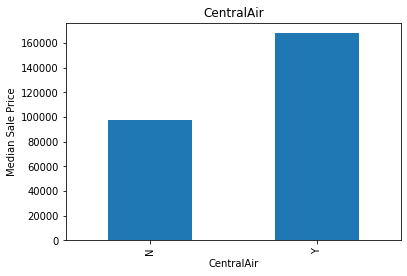

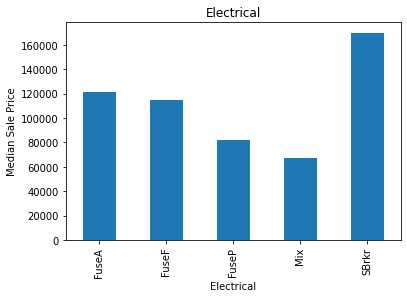

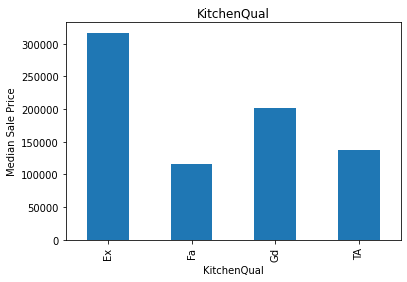

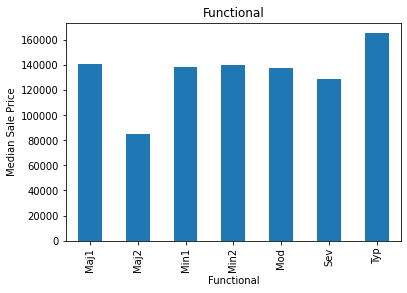

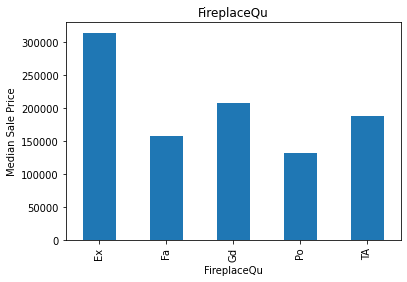

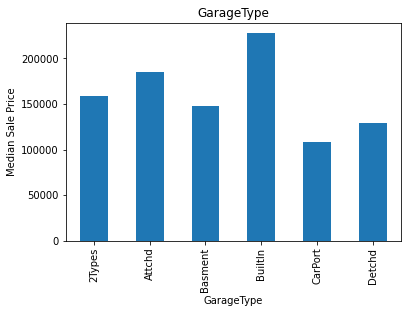

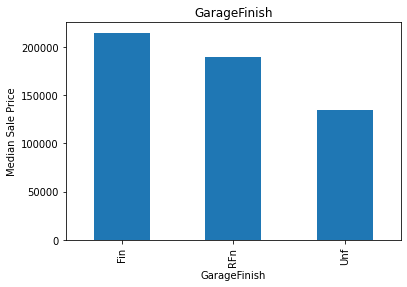

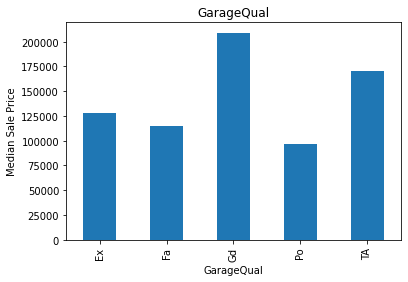

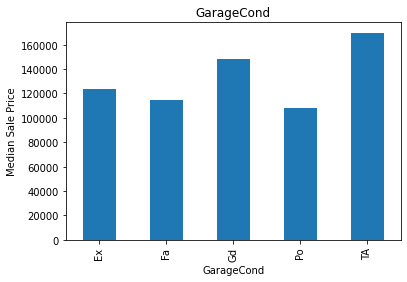

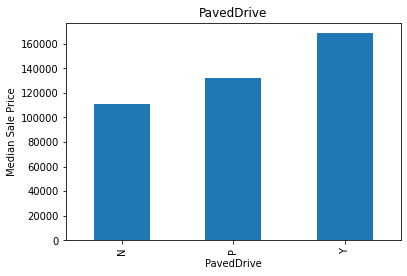

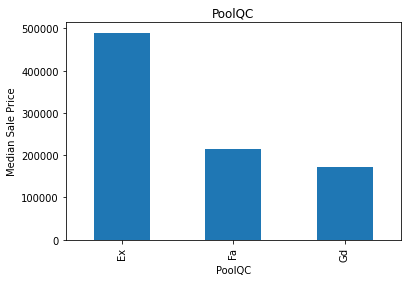

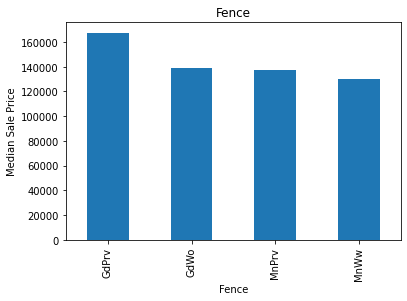

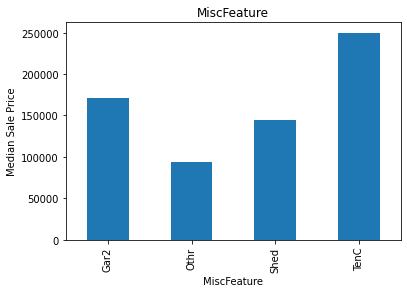

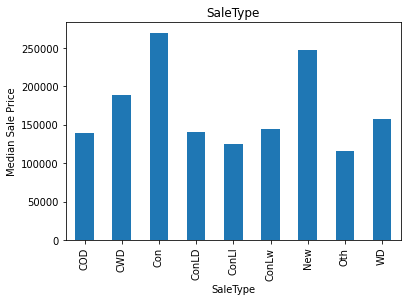

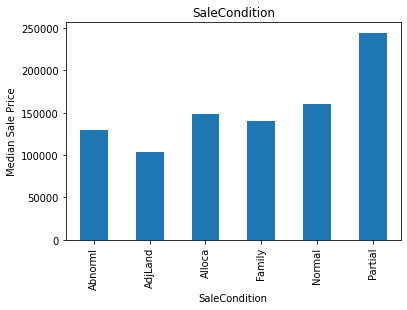

In [53]:
for var in cat_vars:
    analyze_discrete(data, var)